# Trabajo 1

En este notebook se mostraran algunos modelos con mínimos cuadrados para la predicción del precio del bitcoin , y veremos algunas condiciones que tiene que cumplir nuestros datos, para que el modelo pueda ser resuelto con mínimos cuadrados

---

## Introducción

Actualmente el mercado del bitcoin es de los mas volatiles y debido a esto  puede llegar a generar una gran perdida o una gran ganancia al momento de invertir,por lo cual nos interesa plantear modelos de predicción de su precio, primero plantearemos un modelo no lineal y luego se plantearán modelos que relacionen el precio del bitcoin con el precio de algunas commodities , y observar si mediante estos modelos se puede encontrar alguna relación de estos mercados. Como nos interesa resolver los modelos mediante mínimos cuadrados, Iniciaremos mirando las condiciones que tienen que tener mis datos para que el modelo pueda ser resuelto:


## 1. Condiciones en el modelo

Relacionado con la naturaleza de los datos, nos interesa saber en un modelo resuelto con mínimos cuadrados que condiciones tiene que cumplir la matriz $A$ y el vector $b$ para que el modelo pueda ser resuelto.

Ejecuta el siguiente notebook:
[condiciones_del_modelo.ipynb](./condiciones_del_modelo.ipynb)

## 2. Modelo no lineal para la predicción del precio del bitcoin

En el siguiente notebook se plantea un modelo no lineal para la predicción del precio bitcoin, y observaremos su funcionamiento con la predicción de los precios de los siguientes dias.

Ejecuta el siguiente notebook:
[modelo_no_lineal.ipynb](./Modelo_no_lineal.ipynb)

---

## 3. Bitcoin y su relación con algunas commodities

En el siguiente notebook se plantearan distintos modelos resueltos con minimos cuadrados,y observar si existe alguna relación del precio del bitcoin y el precio del oro,la plata y el petroleo.

Ejecuta el siguiente notebook:
[commodities.ipynb](./Commodities.ipynb)

---

In [1]:
using CSV
using DataFrames

#Bitcoin Data
dataBitcoin = CSV.read("Bitcoin.csv",DataFrame);
dataBitcoin.Date .= dataBitcoin.Date;
dataBitcoin.PriceFloat = dataBitcoin.Price;

#Oil Data
dataOil = CSV.read("Oil.csv",DataFrame);
dataOil.Date .= dataOil.Date;
dataOil.PriceFloat = dataOil.Price;

#Gold Data
dataGold = CSV.read("Gold.csv",DataFrame);
dataGold.Date .= dataGold.Date;
dataGold.PriceFloat = dataGold.Price;

#Silver Data
dataSilver = CSV.read("Silver.csv",DataFrame);
dataSilver.Date .= dataSilver.Date;
dataSilver.PriceFloat = dataSilver.Price;

#Date in common
common=intersect(dataSilver.Date,dataOil.Date,dataGold.Date,dataBitcoin.Date)

#restrict the data
dataOil=dataOil[in(common).(dataOil.Date), :];
dataBitcoin=dataBitcoin[in(common).(dataBitcoin.Date), :];
dataGold=dataGold[in(common).(dataGold.Date), :];
dataSilver=dataSilver[in(common).(dataSilver.Date), :]



,Date,Price,Open,High,Low,Vol.,Change %,PriceFloat
,String15,Float64,Float64,Float64,Float64,String7,String7,Float64
1,"Mar 11, 2022",26.16,26.255,26.35,25.695,51.55K,-0.37%,26.16
2,"Mar 10, 2022",26.256,26.06,26.425,25.6,55.85K,1.70%,26.256
3,"Mar 09, 2022",25.816,26.925,27.39,25.73,87.11K,-4.01%,25.816
4,"Mar 08, 2022",26.895,25.805,27.495,25.55,127.21K,4.57%,26.895
5,"Mar 07, 2022",25.72,26.025,26.37,25.465,81.50K,-1.96%,25.72
6,"Mar 04, 2022",25.789,25.285,25.92,25.155,70.86K,2.29%,25.789
7,"Mar 03, 2022",25.212,25.45,25.665,25.075,57.47K,0.09%,25.212
8,"Mar 02, 2022",25.19,25.505,25.545,24.96,69.47K,-1.37%,25.19
9,"Mar 01, 2022",25.541,24.455,25.65,24.345,68.56K,4.82%,25.541


In [2]:
dataSilver.PriceFloat = dataSilver.Price;

dataOil.PriceFloat = dataOil.Price;

dataGold.Price .= replace.(dataGold.Price, "," => "");
dataGold.PriceFloat = parse.(Float64, dataGold.Price);

dataBitcoin.Price .= replace.(dataBitcoin.Price, "," => "");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);

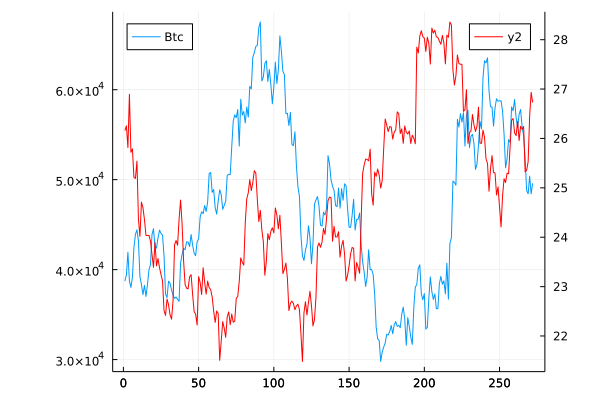

In [3]:
using Plots
plot(dataBitcoin.PriceFloat,label="Btc",legend=:topleft, rightmargin = 1.2Plots.cm, leftmargin = 1.2Plots.cm)
plot!(twinx(),dataSilver.PriceFloat,color=:red)

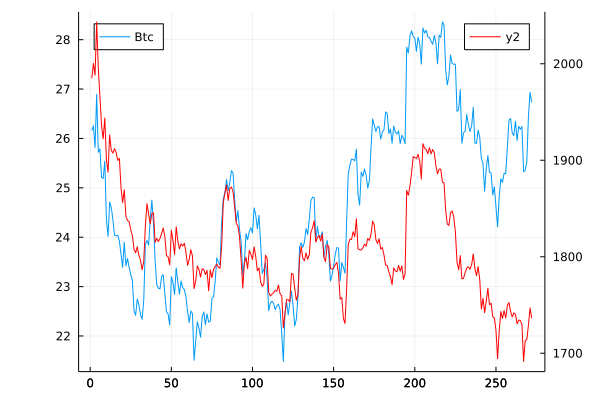

In [4]:
using Plots
plot(dataSilver.PriceFloat,label="Btc",legend=:topleft, rightmargin = 1.2Plots.cm, leftmargin = 1.2Plots.cm)
plot!(twinx(),dataGold.PriceFloat,color=:red)

In [15]:
N = size(dataOil.PriceFloat,1);
A = [ones(272,1) dataSilver.PriceFloat ];
b = dataOil.PriceFloat;
xhat = A\b

2-element Vector{Float64}:
 117.66593193041935
  -1.7498953942914743

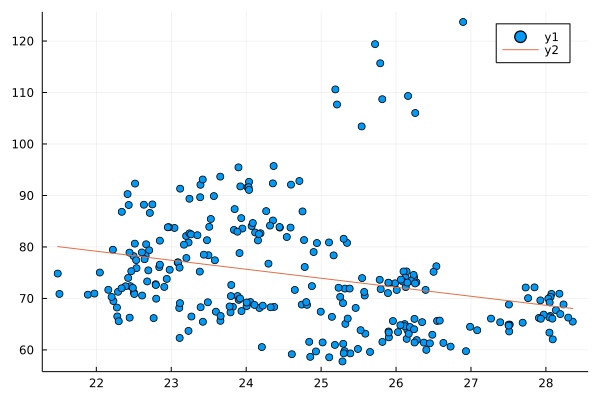

In [16]:
using Plots


pred = xhat[2]*A[:,2] + xhat[1]*ones(N,1)
#pred = ones(272,1)*xhat[1]+xhat[2].*cos.(LinRange(1650,2000,272))
# x and y given as arrays
scatter(dataSilver.PriceFloat, dataOil.PriceFloat)
plot!(A[:,2],pred)

[117.66593193041935, -1.7498953942914743]

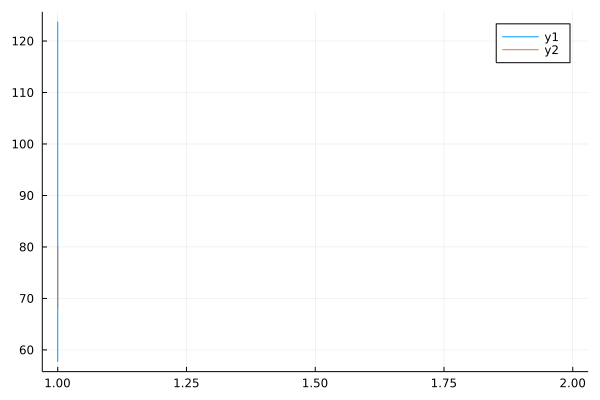

In [7]:

using Plots
days=ones(N,1)
xhat = A\b
print(xhat)
pred = xhat[2]*A[:,2] + xhat[1]*ones(N,1)
plot(days,b)
plot!(days,pred)


In [8]:
N = size(dataBitcoin.PriceFloat,1);
days=Array((1:N))
A = [ones(N,1) days (days).^2];
b = dataBitcoin.PriceFloat;


In [9]:
N = size(dataBitcoin.PriceFloat,1);
days=Array((1:N))
A = [ones(N,1)  days.^2 sqrt.(days)];
b = dataBitcoin.PriceFloat;

[42619.386255035286, -0.009209500388155344, 434.30966808876724]

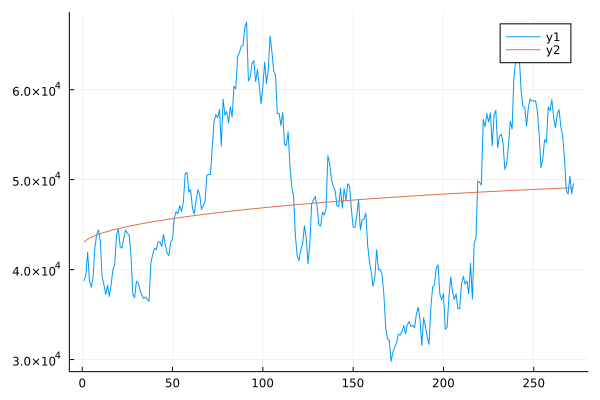

In [10]:
xhat = A\b
print(xhat)
pred =xhat[3]*A[:,3]+xhat[2]*A[:,2] + xhat[1]*ones(N,1)
plot(days,b)
plot!(days,pred)


In [11]:
N = size(dataBitcoin.PriceFloat,1);
days=Array((1:N))
A = [ones(N,1) sin.(days) sin.(days.^2) ];
b = dataBitcoin.PriceFloat;

[47168.375792911684, 174.74603606537877, 1192.4963092598468]

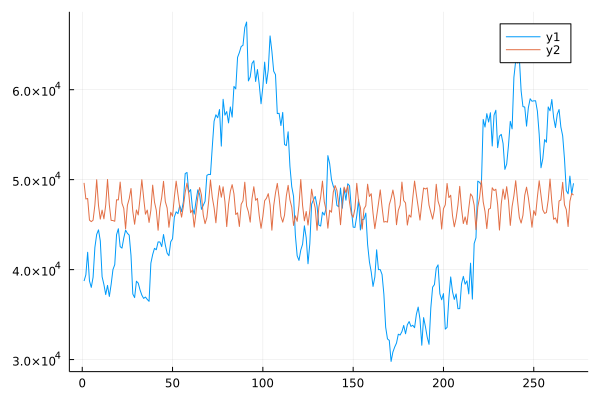

In [12]:
xhat = A\b
print(xhat)
pred =xhat[3]*A[:,3]+ 10xhat[2]*A[:,2] + xhat[1]*ones(N,1)
plot(days,b)
plot!(days,pred)